# Stationarity in Time Series Data

Time series is different from more traditional classification and regression preditive modeling problems as teh temporal structure adds an order to the the observations. This imposed order means that important assumptions about the consisitency of those observations needs to be handled specifically. For example, when modeling, there are assumptions that the summary statistics of the observationsa are consistent. In time series terminology this is expectation is referred to as the time series being stationary. These assumptions can be easily violated in time seies by the addition of a trend, seasonality, and other time-dependent structures.

## Stationary Time Series

Observations in a stationary time series are not dependent on time. Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations. When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the teim series to be stationary to be effective. Below is an example of the Daily Female Births dataset that is stationary.

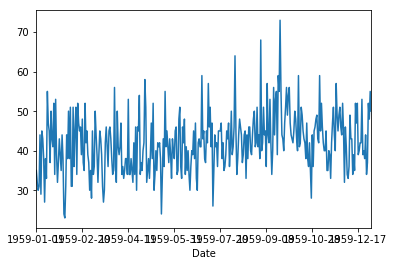

In [7]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('female-births.csv', header=0)
series = series[:-1]
series.plot()
pyplot.show()

## Non-Stationary Time Series

Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index. Summary statistic like the mean and variance do change over time, providing a drift in the concepts a model may try to capture. Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing stationary effects. Below is an example of the airline passengers dataset that is non-stationary, showing both trend and seasonal components:

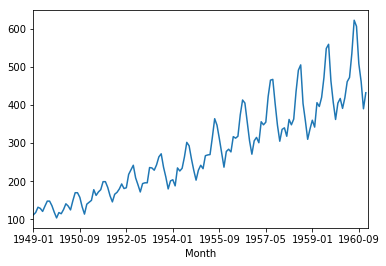

In [9]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('airline.csv', header=0)
series.plot()
pyplot.show()


## Types of Stationary Time Series

The notion of stationarity comes from the theoretical study of time series and it is a useful abstraction when forecasting. There are some finer-grained notions of stationarity that you might come across:
- Stationary Process: A process that generates a stationary series of observations
- Stationary Model: a model that describes a stationary series of observations
- Trend Stationary: A time series that does not exhibit a trend
- Seasonal Stationary: A time series that does not exhibit seasonality
- Strictly Stationary: A mathematical definition of a stationary process, psecifically that the joint distribution of observations is invariant to time shift

## Checks for Stationarity
There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary:
- Look at plots: you can review a time series plot of your data and visually check if there are any obvious trends or seasonality
- Summary Statistics: you can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences
- Statitistical Test: you can use statistical tests to check if teh expectations of stationarity are met or have been violated

### Summary Statistics
A quick and dirty check to see if your time series is non-staionary is to review summary statistics. You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary

### Female Births:

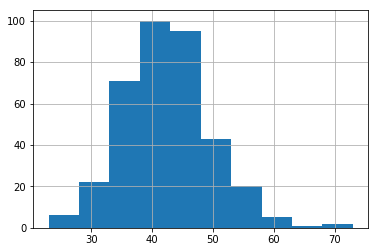

In [11]:
# plot histogram of time series
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('female-births.csv', header=0)
series = series[:-1]
series.hist()
pyplot.show()

In [13]:
# Now split timer series and calculate statistics
from pandas import Series
series = Series.from_csv('female-births.csv', header=0)
series = series[:-1]
X = series.values
split = int(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


### Airline Passengers:

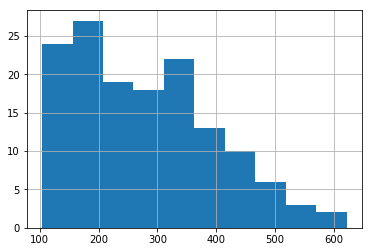

In [14]:
# plot histogram of time series
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('airline.csv', header=0)
series.hist()
pyplot.show()

Distribution of values do not look Gaussian, thus mean and variance values are less meainful. The squashed distribution of the observations may be an indicator of a non-stationary time series

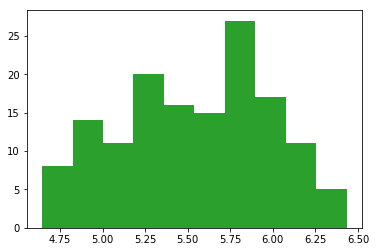

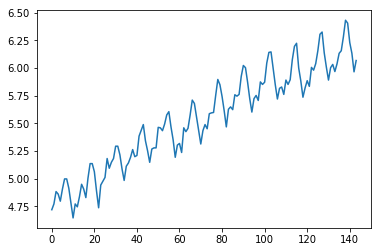

In [18]:
#Histogram and line plot of log transformed time series
from pandas import Series
from matplotlib import pyplot as pt
from numpy import log
series = Series.from_csv('airline.csv', header=0)
series = series[:-1]
X = series.values
X = log(X)
pt.hist(X)
pt.show()
pt.plot(X)
pt.show()

In [25]:
# Calculate statistics of partitioned log transformed time series data
from pandas import Series
from matplotlib import pyplot
from numpy import log
series = Series.from_csv('airline.csv', header=0)
X = series.values[:-1]
X = log(X)
split = int(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('var1=%f, mean2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
var1=0.068375, mean2=0.049264


STDs and Vars are similar but not identical; numbers alone might suggest stionarity but as evidenced by the line plot this might no be the case. This is a quick and dirty method that may be easily fooled. Statistical tests can be used to check if the difference between the two samples of Gaussian random variables is real or statistical fluke.

## Augmented Dickey-Fuller test
Statistical tests make strong assumptions about data. The can only be used to inform the degree to which a null hypothesis can be accepted o rejected. The results must be interpreted for a given problem to be meaninful.

The Augmented Dikcy-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. This test may be one of the more wildly used unit root test, using an autoregressive model and optimizes an information criterion across multiple different lag valus. The null hypothesis of the test is that the time series can be represented by a unit root, that is not a stationary (has some time-dependent structure). The alternate hypothesis(rejecting the null hypothesis) is that the time series is stationary.
- Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.



We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).
- p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [28]:
# Calculate stationarity test of time series data with Augmented Dickey-Fuller test - Female Births
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = Series.from_csv('female-births.csv', header=0)
X = series.values[:-1]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Test returns a value of -4.8; the more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). As test value is less than the value at 1%, we can reject the null hypothesis with a asignficance level of less than 1% (i.e. low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root and in turn that the time series is stationary or does not have a time dependent structure.

In [33]:
# Calculate Stationarity using Augemented Dicky-Fuller test - Airline Passenger data
from pandas import Series
from statsmodels.tsa.stattools import adfuller

series = Series.from_csv('airline.csv', header=0)
X = series.values[:-1]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Test returns positive test statistic, meaning we are much less likely to reject the null hypothesis; time series is non-stationary and does have a time-dependent structure.

In [35]:
# Calculate Stationarity test of the log transformed Airline Passenger data
from pandas import Series
from numpy import log
from statsmodels.tsa.stattools import adfuller

series = Series.from_csv('airline.csv', header=0)
X = series.values[:-1]
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


ADF statistic now negative but larger than the critical value; time series under log transformation is still time-dependent